# **Introduction**

Looking into the data provided, we can separated from the get go three countries which represent more than 95% of user registrations: Finland (`FIN`), Denmark (`DNK`), and Greece (`GRC`).

## *Quickly cutting to the chase*

Users that adopt `web` platform are a highly profitable group, but they usually tend to take more time between purchases. Wolt should take a course of action to reduce this gap. There is a weak correlation showing that those that make their first purchase earlier usually tend to make larger overall purchases.

If we cut the data across countries, we can observe that Danes are the only group that prefer `web` platform over `android`. Not only that, but they also consume in larger spaces of time. If we take as true that closing the gap between the registration to the first purchase day leads to higher overall consumption, Wolt should be targeting `web` users in Denmark to close the gap.

### *Not so fast*

Let's slow down and see the data first. First, let's first show the registration by country.

In the below code we can observe that Finland, Denmark, and Greece sum up to **97.3%** of total registered users.

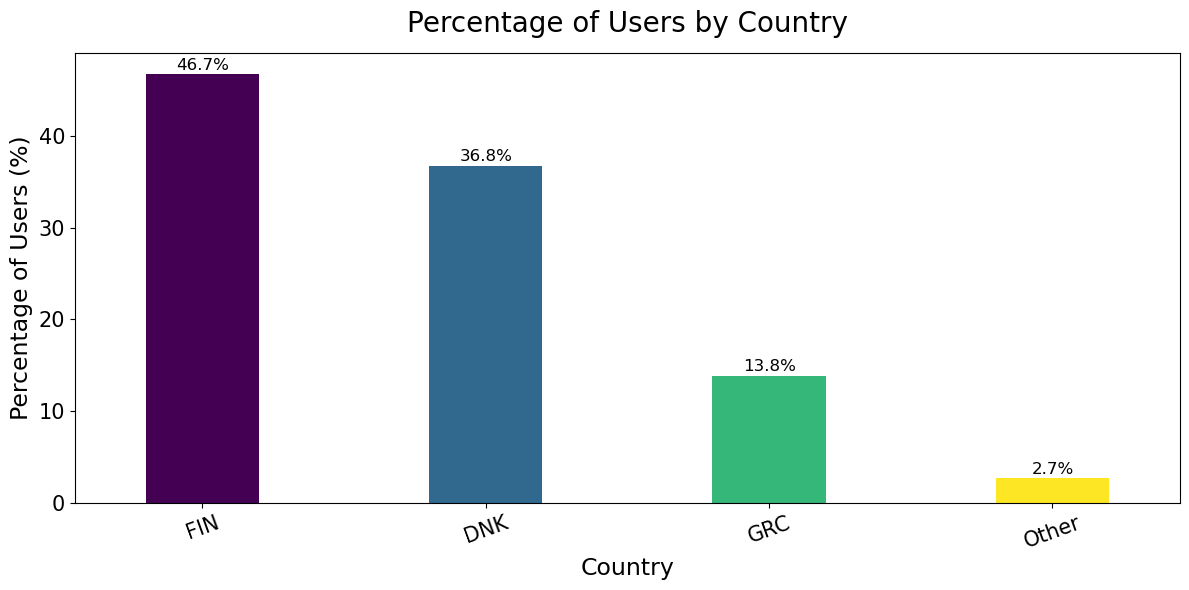

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from parsing import loadCsvData, findPath

# set which countries should supposedly be majority
validCountries = ["FIN", "DNK", "GRC"]

# load dataframe not parsed
df: pd.DataFrame = loadCsvData(findPath())

# copy dataframe
dfCopy = df.copy()

# join all other countries that are not in validCountries
dfCopy.loc[~dfCopy['REGISTRATION_COUNTRY'].isin(validCountries), \
		'REGISTRATION_COUNTRY'] = 'Other'

# count users by country and convert to percentages
countryCounts = dfCopy['REGISTRATION_COUNTRY'].value_counts()
countryPercentages = countryCounts / countryCounts.sum() * 100

# sort values
countryPercentages = countryPercentages.sort_values(ascending=False)

# plot
plt.figure(figsize=(12,6))
countryPercentages.plot(kind='bar', width=0.4, color=plt.cm.viridis(np.linspace(0, 1, len(countryPercentages))))
plt.title('Percentage of Users by Country', fontsize=20, pad=15)
plt.xlabel('Country', fontsize=17)
plt.ylabel('Percentage of Users (%)', fontsize=17)
plt.xticks(rotation=20, size=15)
plt.yticks(size=15)

# Add percentage labels on top of each bar
for i, v in enumerate(countryPercentages):
    plt.text(i, v + 0.5, f'{v:.1f}%', ha='center', fontsize=12)

plt.tight_layout()
plt.show() 

### *Preferred devices?*

Among all registered clients, `web` users seem to be a minority in overall and percentage of users. However, if you consider only this piece of information to make assumptions, you might be down to a rough road. 

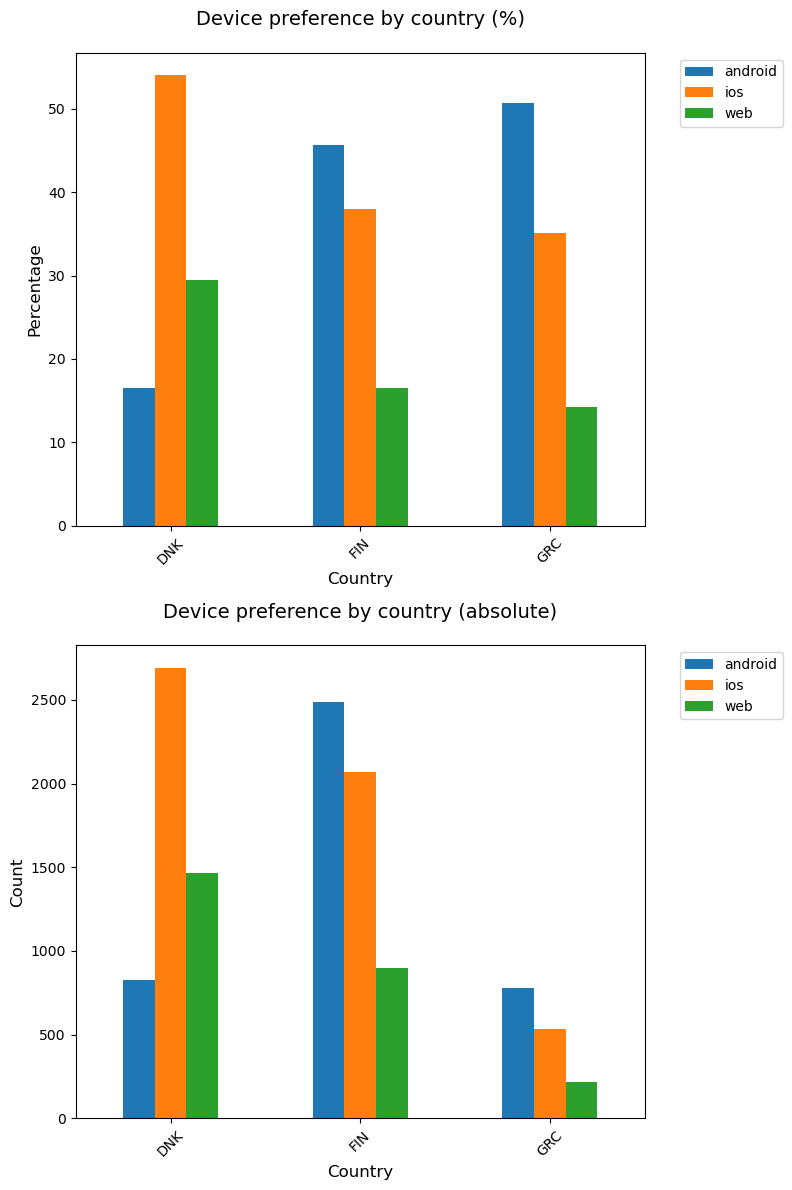

In [2]:
from osCountry import osPlot
from parsing import parseDf

# plot users OS by country
df = parseDf()
osPlot(df)

### *Web users purchase pattern*

In average, be it mean or median values, `web` users are as profitable group as `iOS` or `Android` users. That is true within maximum AND minimum values that they spend!

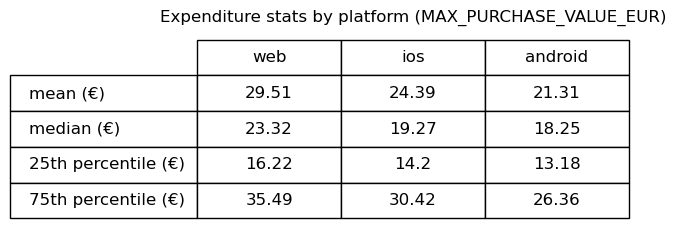

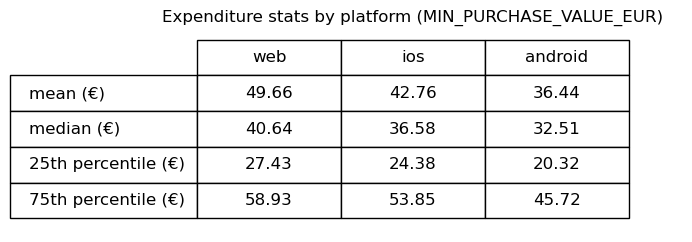

In [3]:
from osSpending import minMaxPurchase, plotPurchaseTable

df = parseDf()
maxDataFrame = minMaxPurchase(df, "min")
minDataFrame = minMaxPurchase(df, "max")
plotPurchaseTable(maxDataFrame, "(MAX_PURCHASE_VALUE_EUR)")
plotPurchaseTable(minDataFrame, "(MIN_PURCHASE_VALUE_EUR)")

## Conversion rate

What is "conversion rate" here? What does it mean to "convert"? It means how long it takes from the day that they register to their first purchase.

Not only they spend more, or as much, but `web` users are more likely to make their first purchase with Wolt.

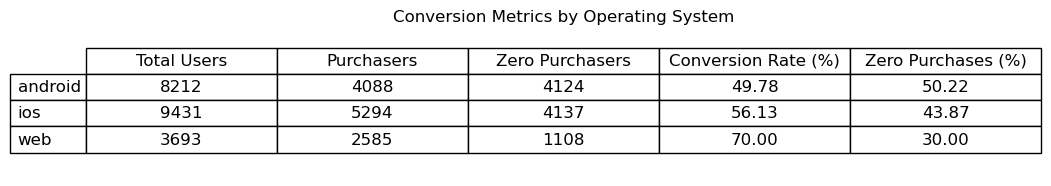

In [4]:
import pandas as pd
from parsing import sliceByCountry
from conversionOs import conversionByOs

df = pd.read_csv('dataset_for_datascience_assignment.csv')
df = sliceByCountry(df)
conversionByOs(df)

### Days until a first purchase

`web` users take way less time to start purchasing products in Wolt. The table below shows that they are early adopters and get their first purchase ealier than other

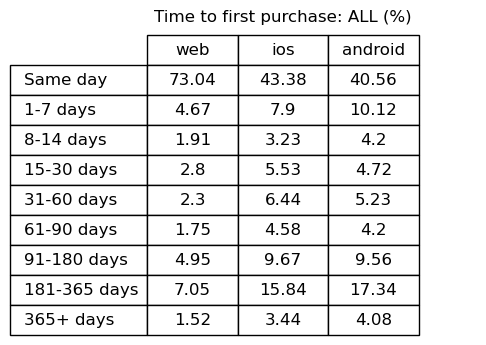

In [5]:
from firstPurchase import firstPurchase

# plot users OS by country
df = parseDf()

# Uncomment individually to view data from each of three countries
# firstPurchase(df, "FIN")
# firstPurchase(df, "GRC")
# firstPurchase(df, "DNK")
firstPurchase(df, "ALL")

# Relationship between early and late adopters

Earlier adopters seem to spend more money

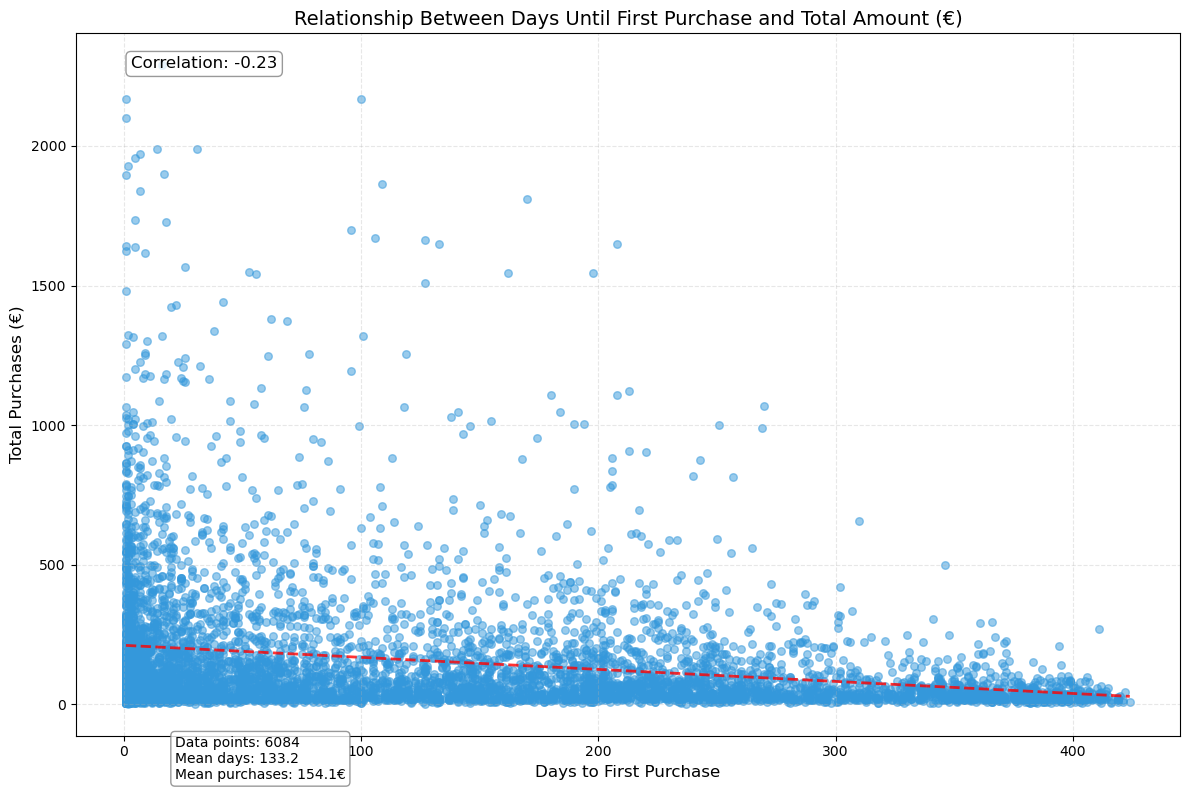

In [6]:
from osSpending import scatterPlotTotalPurchases
from parsing import parseDf

scatterplot = parseDf()
# scatterPlotTotalPurchases(scatterplot, "web")
# scatterPlotTotalPurchases(scatterplot, "ios")
# scatterPlotTotalPurchases(scatterplot, "android")
scatterPlotTotalPurchases(scatterplot)